# House Sales in King County, USA

A dataset from [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction) containing prices of houses is provided.

We want to build a  model that can determine the prices of a given house according to a number of features. We will use a subset of the data for training and the remaining for testing our modeling.

### Outline

We separate the project in 3 steps:

Data Loading and Exploratory Data Analysis: Load the data and analyze it to obtain an accurate picture of it, its features, its values (and whether they are incomplete or wrong), its data types among others. Also, the creation of different types of plots in order to help us understand the data and make the model creation easier.

Feature Engineering / Modeling: Once we have the data, we create some features and then the modeling stage begins, making use of different models with different transformers, we will hopefully produce a model that fits our expectations of performance. Once we have that model, a process of tuning it to the training data would be performed.

Results and Conclusions: Finally, with our tuned model, we  predict against the test set, then we review those results against their actual values to determine the performance of the model, and finally, outline our conclusions.

In [5]:
library(caret)
library(GGally)
library(leaflet)
library(ggplot2)
library(geosphere)
library(IRdisplay)
library(lubridate)
library(gridExtra)
library(doParallel)
library(data.table)
library(htmlwidgets)

### Setting up the cluster to run in parallel

In [ ]:
cluster <- makeCluster(detectCores() - 1)
registerDoParallel(cluster)

### Setting Key Values

The following values are used throught the code, this cell gives a central source where they can be managed.

In [6]:
set.seed(9560)

### Data Loading

Here we load the necessary data, describe its contents and print its first rows.

In [81]:
train<-fread('https://gist.githubusercontent.com/akoury/da3cdb6bfde9eb2f3f5d3f5246dfd6b6/raw/1b057c119af85ab22330a50239d5c0bdbab7fb64/train.csv')
test<-fread('https://gist.githubusercontent.com/akoury/83c7ce5544dc467a696967bd13d4f498/raw/e9a54dce92f6d115d1e08cbf7668f5cf70e60598/test.csv')

Warning message in require_bit64():
“Some columns are type 'integer64' but package bit64 is not installed. Those columns will print as strange looking floating point data. There is no need to reload the data. Simply install.packages('bit64') to obtain the integer64 print method and print the data again.”Warning message in require_bit64():
“Some columns are type 'integer64' but package bit64 is not installed. Those columns will print as strange looking floating point data. There is no need to reload the data. Simply install.packages('bit64') to obtain the integer64 print method and print the data again.”

In [4]:
str(train)

Classes ‘data.table’ and 'data.frame':	17277 obs. of  21 variables:
 $ id           : 'integer64' num  4.54e-314 2.29e-315 1.10e-314 3.05e-314 3.16e-314 ...
 $ date         : chr  "5/13/2014" "8/27/2014" "7/18/2014" "1/30/2015" ...
 $ price        : num  225000 641250 810000 330000 530000 ...
 $ bedrooms     : int  3 3 4 4 4 4 4 3 4 3 ...
 $ bathrooms    : num  1.5 2.5 3.5 1.5 1.75 3.5 3.25 2.25 2.5 1.5 ...
 $ sqft_living  : int  1250 2220 3980 1890 1814 3120 4160 1440 2250 2540 ...
 $ sqft_lot     : int  7500 2550 209523 7540 5000 5086 47480 10500 6840 9520 ...
 $ floors       : num  1 3 2 1 1 2 2 1 2 1 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 2 2 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 4 4 3 3 3 3 3 ...
 $ grade        : int  7 10 9 7 7 9 10 8 9 8 ...
 $ sqft_above   : int  1250 2220 3980 1890 944 2480 4160 1130 2250 1500 ...
 $ sqft_basement: int  0 0 0 0 870 640 0 310 0 1040 ...
 $ yr_built     : int  1967 1990 2006 1967 1951 2008 1995 1983

In [5]:
summary(train)

       id        date               price            bedrooms     
 Min.   :0   Length:17277       Min.   :  78000   Min.   : 1.000  
 1st Qu.:0   Class :character   1st Qu.: 320000   1st Qu.: 3.000  
 Median :0   Mode  :character   Median : 450000   Median : 3.000  
 Mean   :0                      Mean   : 539865   Mean   : 3.369  
 3rd Qu.:0                      3rd Qu.: 645500   3rd Qu.: 4.000  
 Max.   :0                      Max.   :7700000   Max.   :33.000  
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.500   Min.   :  370   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1430   1st Qu.:   5050   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7620   Median :1.500  
 Mean   :2.114   Mean   : 2080   Mean   :  15186   Mean   :1.493  
 3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10695   3rd Qu.:2.000  
 Max.   :8.000   Max.   :13540   Max.   :1164794   Max.   :3.500  
   waterfront            view          condition         grade

In [6]:
head(train)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4.537352e-314,5/13/2014,225000,3,1.50,1250,7500,1,0,0,⋯,7,1250,0,1967,0,98030,47.3719,-122.215,1260,7563
2.292468e-315,8/27/2014,641250,3,2.50,2220,2550,3,0,2,⋯,10,2220,0,1990,0,98117,47.6963,-122.393,2200,5610
1.098841e-314,7/18/2014,810000,4,3.50,3980,209523,2,0,2,⋯,9,3980,0,2006,0,98024,47.5574,-121.890,2220,65775
3.045372e-314,1/30/2015,330000,4,1.50,1890,7540,1,0,0,⋯,7,1890,0,1967,0,98155,47.7534,-122.318,1890,8515
3.158069e-314,5/23/2014,530000,4,1.75,1814,5000,1,0,0,⋯,7,944,870,1951,0,98115,47.6840,-122.281,1290,5000
3.939779e-314,5/20/2014,953007,4,3.50,3120,5086,2,0,0,⋯,9,2480,640,2008,0,98115,47.6762,-122.288,1880,5092


### Missing Data

We check if there is any missing data per column.

In [83]:
sapply(train, function(x) sum(is.na(x)))

id          date         price      bedrooms     bathrooms 
            0             0             0             0             0 
  sqft_living      sqft_lot        floors    waterfront          view 
            0             0             0             0             0 
    condition         grade    sqft_above sqft_basement      yr_built 
            0             0             0             0             0 
 yr_renovated       zipcode           lat          long sqft_living15 
            0             0             0             0             0 
   sqft_lot15 
            0

### Duplicated

In [8]:
any(duplicated(train))

[1] FALSE

### Converting column types
Now we convert the data types of multiple columns.

#### Numericals

In [84]:
train[ , which(sapply(train, is.integer)):=lapply(.SD,as.numeric), .SDcols = sapply(train, is.integer)]
test[ , which(sapply(test, is.integer)):=lapply(.SD,as.numeric), .SDcols = sapply(test, is.integer)]

#### Dates
We extract the year, month and days since posting

In [85]:
train$date<-mdy(train$date)
train$year<-year(train$date)
train$month<-month(train$date)
train$days_since<-as.numeric(Sys.Date() - train$date)

test$date<-mdy(test$date)
test$year<-year(test$date)
test$month<-month(test$date)
test$days_since<-as.numeric(Sys.Date() - test$date)

### Dropping unneeded columnss
Now we drop unneeded columns.

In [86]:
train[, c('id','date'):=NULL]
test[, c('date'):=NULL]

## Exploratory Data Analysis

Here we will perform all of the necessary data analysis, with different plots that will help us understand the data and therefore, create a better model.

### Distribution of Apartment Prices

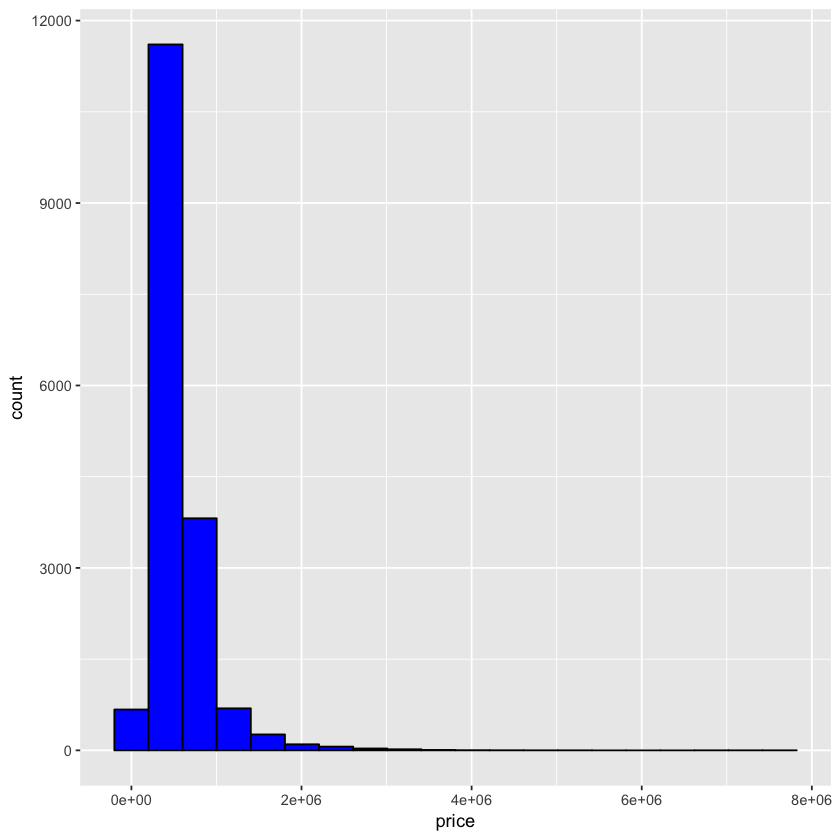

In [14]:
ggplot(train, aes(x=price))+ geom_histogram(bins=20, colour="black", fill="blue")

### Pair plots of each feature vs Price

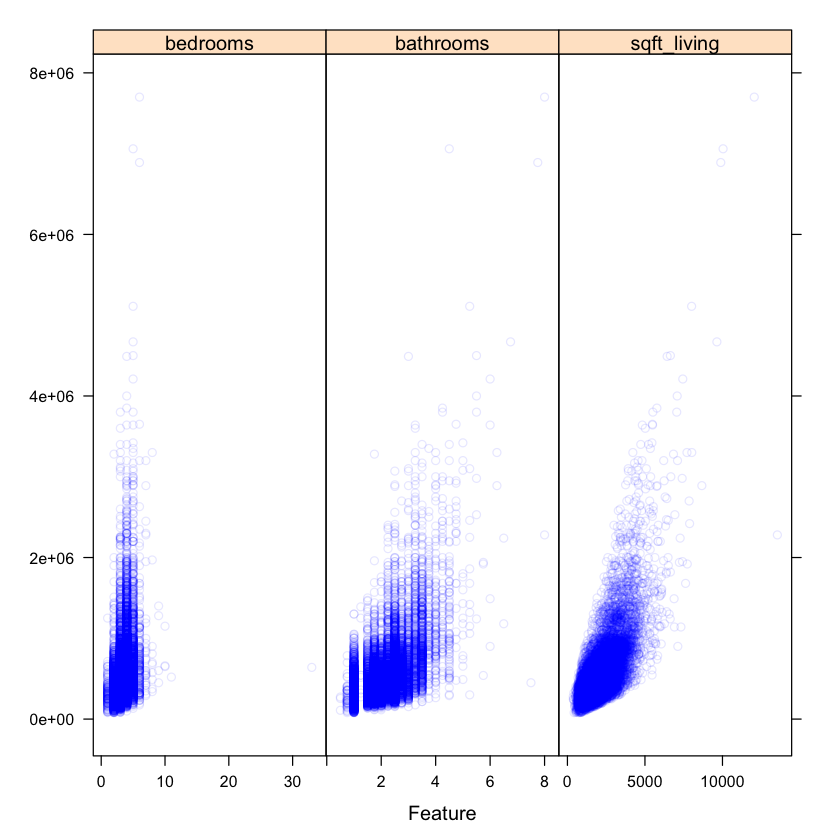

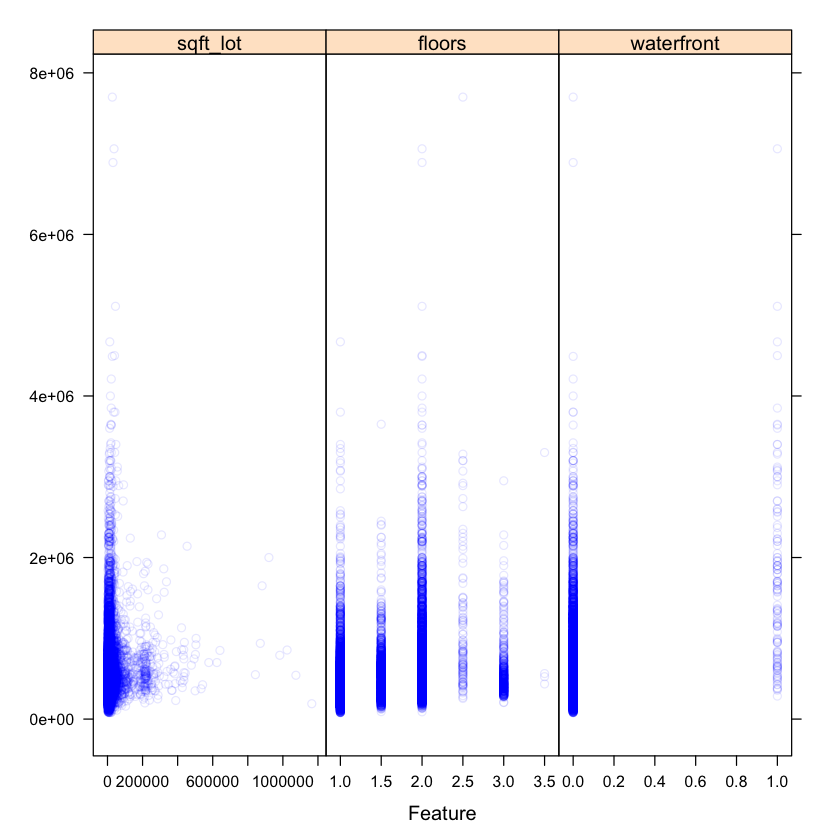

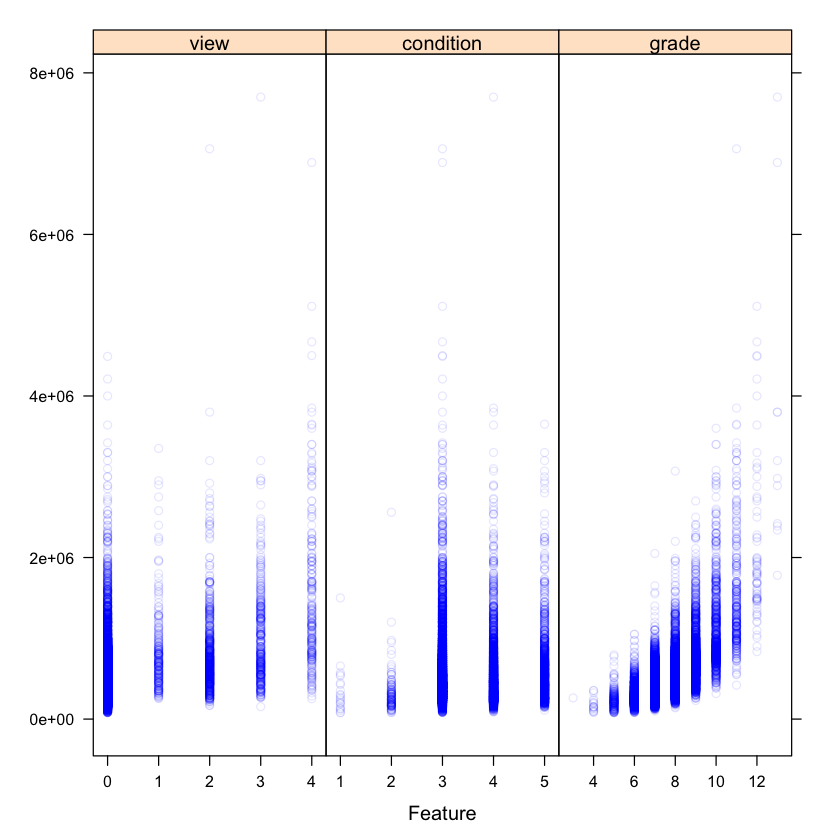

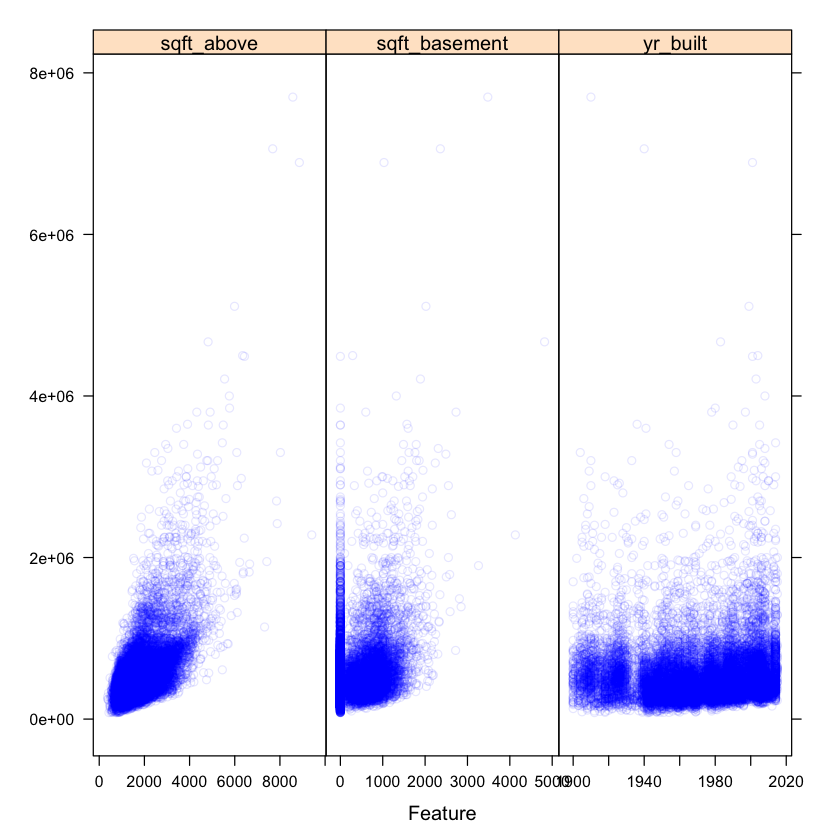

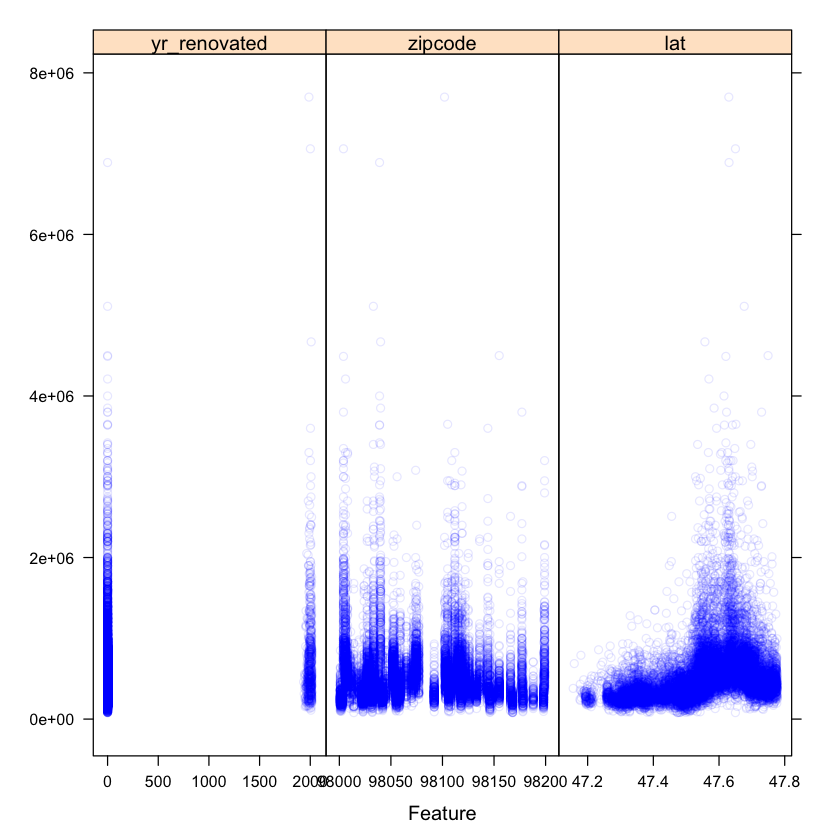

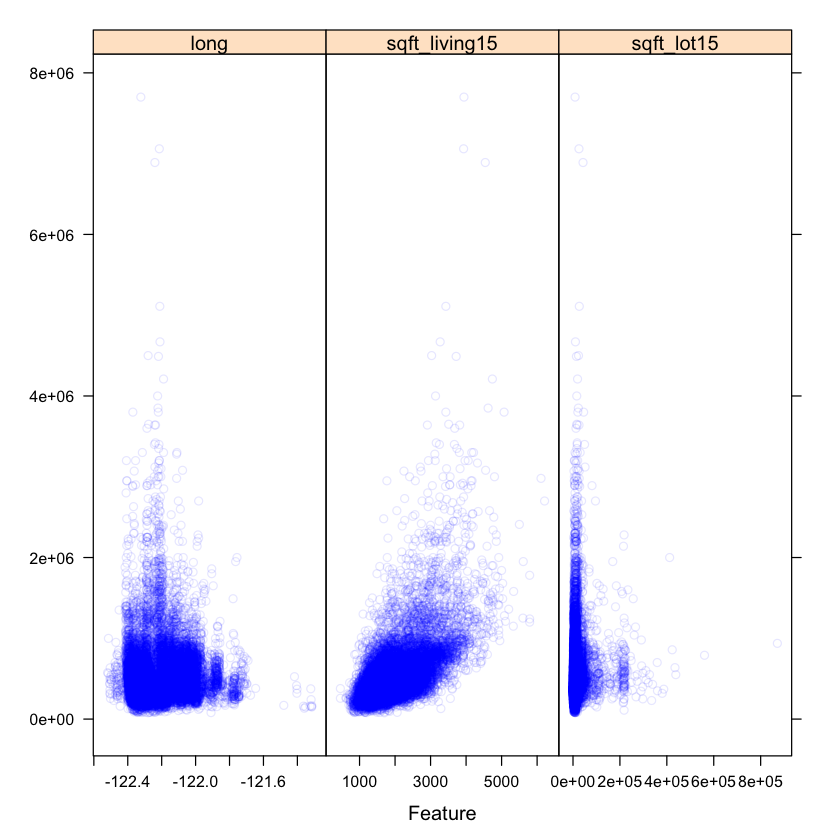

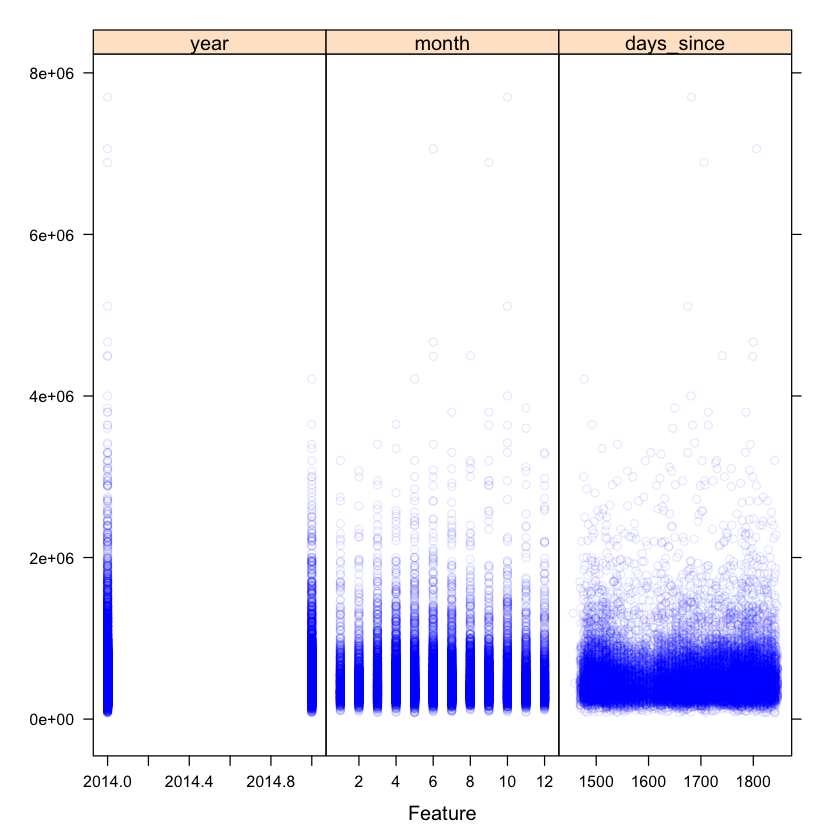

In [15]:
theme <- trellis.par.get()
theme$plot.symbol$col = "blue"
theme$plot.symbol$alpha = 0.1
trellis.par.set(theme)

featurePlot(x = train[, -"price"], y = train$price, plot = "scatter", layout = c(3, 1))

### Feature values per level

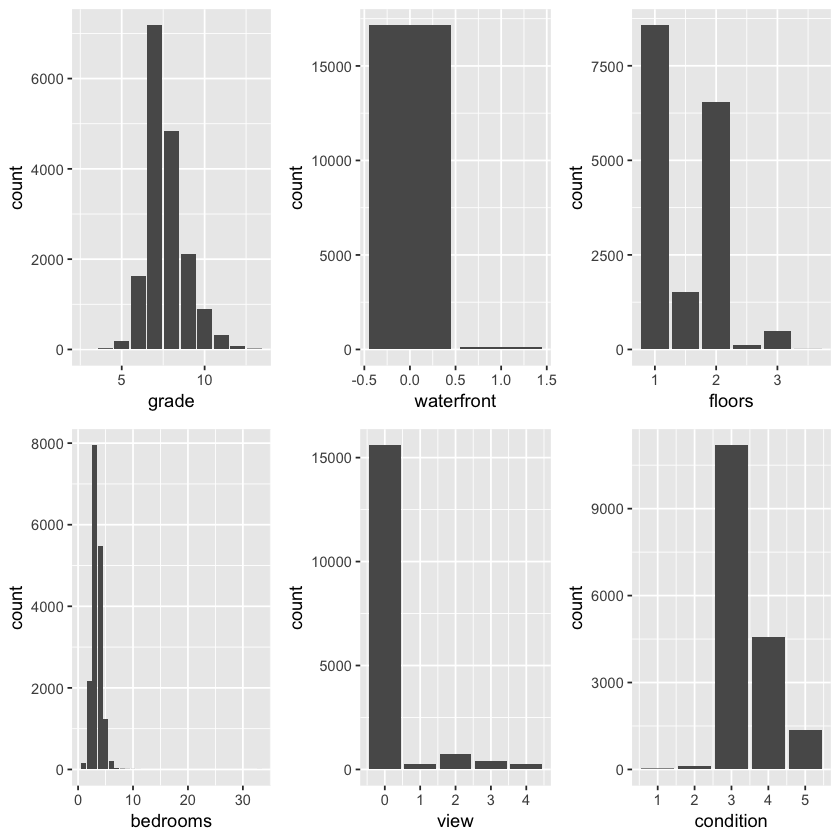

In [93]:
grade<-ggplot(train, aes(x=grade))+geom_bar(stat='count')
waterfront<-ggplot(train, aes(x=waterfront))+geom_bar(stat='count')
floors<-ggplot(train, aes(x=floors))+geom_bar(stat='count')
bedrooms<-ggplot(train, aes(x=bedrooms))+geom_bar(stat='count')
view<-ggplot(train, aes(x=view))+geom_bar(stat='count')
condition<-ggplot(train, aes(x=condition))+geom_bar(stat='count')
grid.arrange(grade, waterfront, floors, bedrooms, view, condition, ncol=3)

### Coefficient of Variation

The coefficient of variation is a dimensionless meassure of dispersion in data, the lower the value the less dispersion a feature has. We will select columns that have a variance of less than 0.01 since they would probably perform poorly.

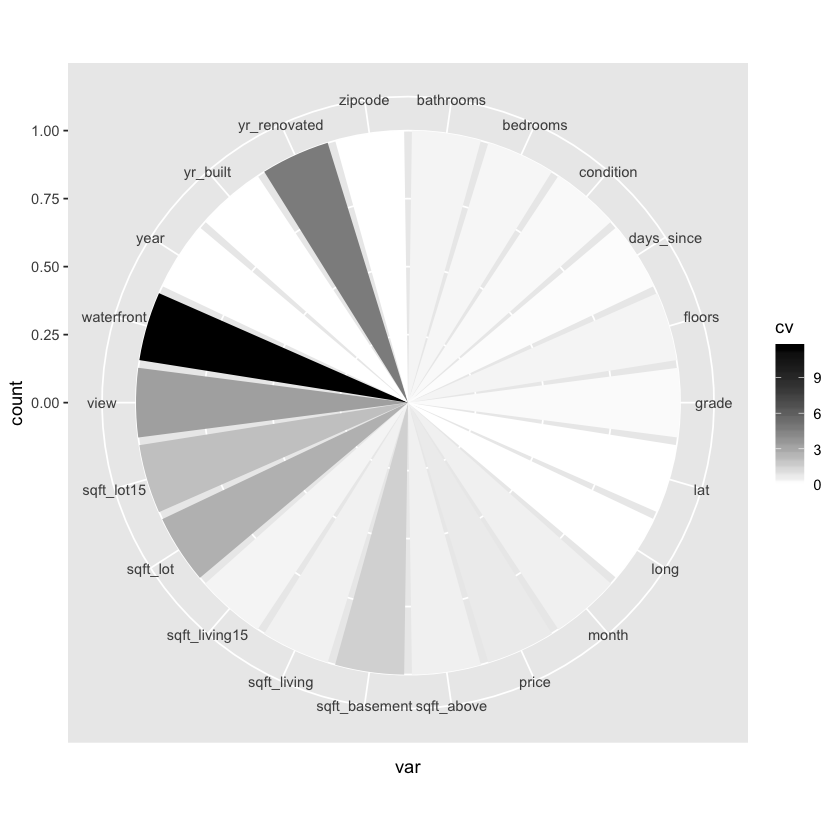

In [89]:
numeric_variables<-names(train)[sapply(train, is.numeric)]

sd_numeric_variables<-sapply(train[,numeric_variables, with=F], sd)
cv_numeric_variables<-sd_numeric_variables/colMeans(train[,numeric_variables, with=F])

ggplot(data.table(var=names(cv_numeric_variables),cv=cv_numeric_variables),
       aes(var,fill=cv))+geom_bar()+coord_polar()+scale_fill_gradient(low='white', high = 'black')

Variables with less than a 0.01 coefficient of variation

In [97]:
cv_numeric_variables[cv_numeric_variables < 0.01]

zipcode           lat          long          year 
 0.0005462536  0.0029200229 -0.0011541909  0.0002320742

### Boxplot of Numerical Variables SHOW FOR ALL FEATURES

We review the distribution of numerical data through a boxplot for each variable that has a coefficient of variation higher than 0.4.

No id variables; using all as measure variables


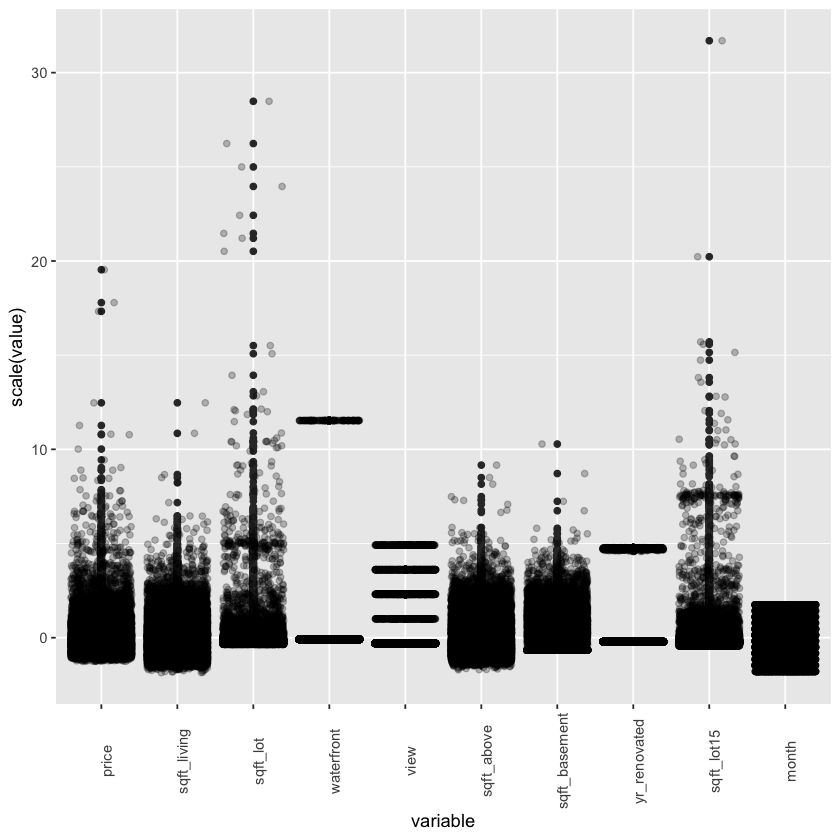

In [104]:
df<-train[, numeric_variables[cv_numeric_variables>0.4], with=F]
df<-data.frame(scale(df))
df<-melt(df)
       
ggplot(df, aes(x=variable, y=scale(value)))+geom_boxplot()+geom_jitter(alpha=.25)+theme(axis.text.x = element_text(angle=90))

## Map of Apartments

In [42]:
centroid<-centroid(train[,c('long','lat')])
palette<-colorNumeric(palette = "plasma", domain = train$price)
map <- leaflet()
map <- addProviderTiles(map, "CartoDB.Positron")
map<-addCircles(map, lat =train$lat, lng =train$long, color=palette(train$price), fillOpacity = 1)
map<-addLegend(map, "bottomright", pal = palette, values = train$price, title = "House Prices", opacity = 1)
map<-setView(map, lng=centroid[1], lat=centroid[2], zoom = 11)
saveWidget(map, 'map.html')

In [139]:
display_html('<iframe src="map.html" width=1000, height=700></iframe>')

### Data Correlation

Now we analyze correlation in the data for both numerical and categorical columns

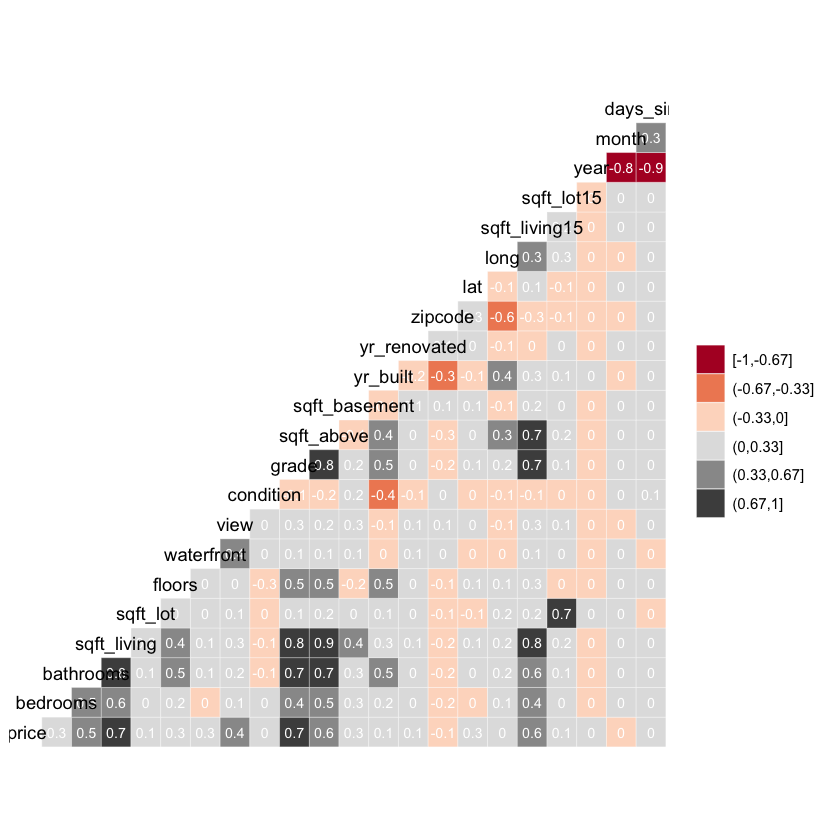

In [116]:
ggcorr(train, nbreaks=6, palette='RdGy', label=TRUE, label_size=3, label_color='white')

#### Subsetting correlations with a threshold of 85%

In [118]:
cor<-as.data.frame(as.table(cor(train)))
subset(cor, abs(Freq) > 0.85 & abs(Freq) < 1)

,Var1,Var2,Freq
77,sqft_above,sqft_living,0.8779126
224,sqft_living,sqft_above,0.8779126
440,days_since,year,-0.8537804
482,year,days_since,-0.8537804


### Linear Dependencies

Caret uses QR decomposition to enumerate sets of linear combinations and therefore, remove them

In [119]:
lc<-findLinearCombos(train)
lc

$linearCombos
$linearCombos[[1]]
[1] 12  4 11


$remove
[1] 12

In [120]:
colnames(train[, 12])

[1] "sqft_basement"

## Baseline Construction

We will perform a baseline against which we will compare our feature engineering efforts to see if they improve the obtained results or not

### Defining Custom Metrics to Evaluate Models

In [121]:
customMetrics <- function (data, lev = NULL, model = NULL) {
    c(
        MAPE = mean(abs(data$obs - data$pred)/data$obs),
        MAE = mean(abs(data$obs - data$pred)),
        RMSE = sqrt(mean((data$obs-data$pred)^2)),
        Rsquared = summary(lm(pred ~ obs, data))$r.squared
    )
}

### Defining Cross Validation Strategy

In [122]:
tc<-trainControl(
        method = "cv",
        number=5,
        savePredictions = TRUE,
        summaryFunction = customMetrics)

### Baseline Linear Regression

In [123]:
lm <- train(price~ ., data = train, method = "lm", trControl=tc)
lm$results

intercept,MAPE,MAE,RMSE,Rsquared,MAPESD,MAESD,RMSESD,RsquaredSD
TRUE,0.2551736,125338.1,198763.5,0.7070054,0.007213759,3835.292,16627.38,0.01189327


## Feature Engineering

A number of different combinations of feature engineering steps and transformations will be performed.

### Drop correlated and linear combinations

In [124]:
train[, c('sqft_above', 'sqft_basement', 'year'):=NULL]
test[, c('sqft_above', 'sqft_basement', 'year'):=NULL]

### Kmeans lat long

In [125]:
clusters <- kmeans(train[, c("lat", "long")], 12)
str(clusters)

List of 9
 $ cluster     : int [1:17277] 6 11 8 4 4 4 9 2 3 4 ...
 $ centers     : num [1:12, 1:2] 47.5 47.3 47.5 47.7 47.6 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:12] "1" "2" "3" "4" ...
  .. ..$ : chr [1:2] "lat" "long"
 $ totss       : num 677
 $ withinss    : num [1:12] 2.6 4.03 7.11 4.95 8.83 ...
 $ tot.withinss: num 59.8
 $ betweenss   : num 617
 $ size        : int [1:12] 1019 1174 1917 1951 1574 1264 1030 509 1836 1250 ...
 $ iter        : int 5
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


### Predicting Cluster for test set function

In [126]:
predict.kmeans <- function(object, newdata){
    centers <- object$centers
    n_centers <- nrow(centers)
    dist_mat <- as.matrix(dist(rbind(centers, newdata)))
    dist_mat <- dist_mat[-seq(n_centers), seq(n_centers)]
    max.col(-dist_mat)
}

In [127]:
train$borough <- as.factor(clusters$cluster)
test$borough <- as.factor(predict.kmeans(clusters, test[, c("lat", "long")]))

### Distance to centroid of map

In [128]:
train$distance<-distm(centroid, train[,c('long','lat')], fun = distHaversine)
test$distance<-distm(centroid, test[,c('long','lat')], fun = distHaversine)

Warning message in `[<-.data.table`(x, j = name, value = value):
“17277 column matrix RHS of := will be treated as one vector”Warning message in `[<-.data.table`(x, j = name, value = value):
“4320 column matrix RHS of := will be treated as one vector”

### Centering and Scaling certain variables

To reduce the weight/importance of certain features, we center them and scale them

In [129]:
pp<-preProcess(train[,c('sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'days_since', 'distance')], method = c("center", "scale"))
pp

Created from 17277 samples and 8 variables

Pre-processing:
  - centered (8)
  - ignored (0)
  - scaled (8)


In [130]:
processed<-train
processed[,c('sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'days_since', 'distance')] <- predict(pp, newdata = processed[,c('sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'days_since', 'distance')])
test[,c('sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'days_since', 'distance')] <- predict(pp, newdata = test[,c('sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'days_since', 'distance')])
head(transformed)

price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15,month,days_since,borough,distance
225000,3,1.50,-0.9033113,-0.1903903,1,0,0,3,7,-0.1360716,-0.2113754,-1.0569377,-0.1943091,5,1.4917177,2,0.4680433
641250,3,2.50,0.1522916,-0.3130134,3,0,2,3,10,0.6469292,-0.2113754,0.3115455,-0.2664194,8,0.5551510,5,0.1679686
810000,4,3.50,2.0676124,4.8141897,2,0,2,3,9,1.1916253,-0.2113754,0.3406622,1.9550413,7,0.9085724,6,1.2426686
330000,4,1.50,-0.2068310,-0.1893995,1,0,0,4,7,-0.1360716,-0.2113754,-0.1397628,-0.1591586,1,-0.8231924,11,0.6113133
530000,4,1.75,-0.2895381,-0.2523212,1,0,0,4,7,-0.6807678,-0.2113754,-1.0132627,-0.2889423,5,1.4033624,11,-0.3505206
953007,4,3.50,1.1317170,-0.2501907,2,0,0,3,9,1.2597124,-0.2113754,-0.1543211,-0.2855454,5,1.4298690,11,-0.4427769


### Defining Categorical Features and One Hot Encoding Them

In [133]:
one_hot<-processed
one_hot$grade <- as.factor(one_hot$grade)
one_hot$view <- as.factor(one_hot$view)
one_hot$condition <- as.factor(one_hot$condition)

dummy<-dummyVars(formula= ~., data = transformed, fullRank=T,sep = "_")
one_hot<-data.table(predict(dummy, newdata = one_hot))
head(one_hot)

price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_1,view_2,view_3,⋯,borough_4,borough_5,borough_6,borough_7,borough_8,borough_9,borough_10,borough_11,borough_12,distance
225000,3,1.50,-0.9033113,-0.1903903,1,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0.4680433
641250,3,2.50,0.1522916,-0.3130134,3,0,0,1,0,⋯,0,0,0,0,0,0,0,1,0,0.1679686
810000,4,3.50,2.0676124,4.8141897,2,0,0,1,0,⋯,0,0,0,0,1,0,0,0,0,1.2426686
330000,4,1.50,-0.2068310,-0.1893995,1,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0.6113133
530000,4,1.75,-0.2895381,-0.2523212,1,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,-0.3505206
953007,4,3.50,1.1317170,-0.2501907,2,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,-0.4427769


### Dropping final unneeded Features TEST MISSING

In [135]:
processed[, c('zipcode', 'lat', 'long'):=NULL]
one_hot[, c('zipcode', 'lat', 'long'):=NULL]
test[, c('zipcode', 'lat', 'long'):=NULL]

## Modeling

After the previous feature engineering steps, different models will be cross validated to accurately review the performance of it.

### Linear Regression

In [137]:
ini<-now()
lm <- train(price~ ., data = one_hot, method = "lm", trControl=tc)
print(now()-ini)
lm$results

Time difference of 1.233872 secs


intercept,MAPE,MAE,RMSE,Rsquared,MAPESD,MAESD,RMSESD,RsquaredSD
TRUE,0.2172028,108583.7,177210.7,0.7677367,0.005039317,1845.373,5285.509,0.008253416


### Random Forest

In [39]:
ini<-now()
rf <- train(price~ ., data = processed, method = "ranger", trControl=tc, importance = "impurity")
print(now()-ini)
rf$results

mtry,min.node.size,splitrule,MAPE,MAE,RMSE,Rsquared,MAPESD,MAESD,RMSESD,RsquaredSD
2,5,variance,0.1925147,93253.74,169551.0,0.8273716,0.003409370,1371.0741,20481.57,0.01935391
2,5,extratrees,0.2378900,112027.41,195839.5,0.8071036,0.004348240,2556.5605,20344.97,0.01438442
14,5,variance,0.1466628,76573.85,141425.4,0.8549310,0.003018447,823.1947,12376.72,0.01477005
14,5,extratrees,0.1453666,75443.08,139307.1,0.8599372,0.003213558,1310.8498,13319.88,0.01034598
27,5,variance,0.1477010,77719.46,143954.2,0.8480625,0.003197174,876.9195,9407.69,0.01587585
27,5,extratrees,0.1438477,74759.31,138010.1,0.8609330,0.003276657,1386.9642,12906.94,0.01177118


### Random Forest with One Hot Encoded Features

In [52]:
ini<-now()
dummy_rf <- train(price~ ., data = one_hot, method = "ranger", trControl=tc, importance = "impurity")
print(now()-ini)
dummy_rf$results

Growing trees.. Progress: 41%. Estimated remaining time: 44 seconds.
Growing trees.. Progress: 80%. Estimated remaining time: 15 seconds.
Time difference of 15.03928 mins


mtry,min.node.size,splitrule,MAPE,MAE,RMSE,Rsquared,MAPESD,MAESD,RMSESD,RsquaredSD
2,5,variance,0.2335786,109010.26,190406.5,0.7978167,0.004290238,4396.090,23655.63,0.02573845
2,5,extratrees,0.2667419,122442.11,207809.3,0.7806149,0.004388806,5198.068,24730.53,0.02507186
22,5,variance,0.1490145,77742.02,146056.7,0.8444766,0.001289658,2818.112,16578.31,0.01328865
22,5,extratrees,0.1466014,76521.08,142523.7,0.8515960,0.003242520,3859.996,22186.45,0.02505823
42,5,variance,0.1505660,79249.30,150076.4,0.8335214,0.001451179,2273.679,13664.13,0.01127537
42,5,extratrees,0.1449015,75639.42,140777.1,0.8547692,0.002681975,3516.019,21331.48,0.02302762


### XGBoost

In [74]:
ini<-now()
xgb <- train(price~ ., data = processed, method = "xgbTree", trControl=tc, importance = TRUE)
print(now()-ini)
head(xgb$results)

,eta,max_depth,gamma,colsample_bytree,min_child_weight,subsample,nrounds,MAPE,MAE,RMSE,Rsquared,MAPESD,MAESD,RMSESD,RsquaredSD
1,0.3,1,0,0.6,1,0.50,50,0.2322627,115896.6,187069.2,0.7404567,0.001960911,1678.6466,5786.586,0.02564892
4,0.3,1,0,0.6,1,0.75,50,0.2302982,114902.6,187594.8,0.7388202,0.002390024,2174.1007,6991.180,0.02399509
7,0.3,1,0,0.6,1,1.00,50,0.2270575,113810.3,188481.1,0.7377022,0.001997303,1505.2718,8084.469,0.02353073
10,0.3,1,0,0.8,1,0.50,50,0.2308065,115146.0,188881.4,0.7347541,0.002819607,798.4431,7251.823,0.02363070
13,0.3,1,0,0.8,1,0.75,50,0.2290937,114744.3,188232.3,0.7370405,0.002160046,2118.3820,8376.477,0.02604199
16,0.3,1,0,0.8,1,1.00,50,0.2275032,114379.8,188697.4,0.7366850,0.003950358,3016.4660,9285.275,0.02379619


## Scores: Comparing Models

### Importances: LM, RF, DUMMY RF, XGB

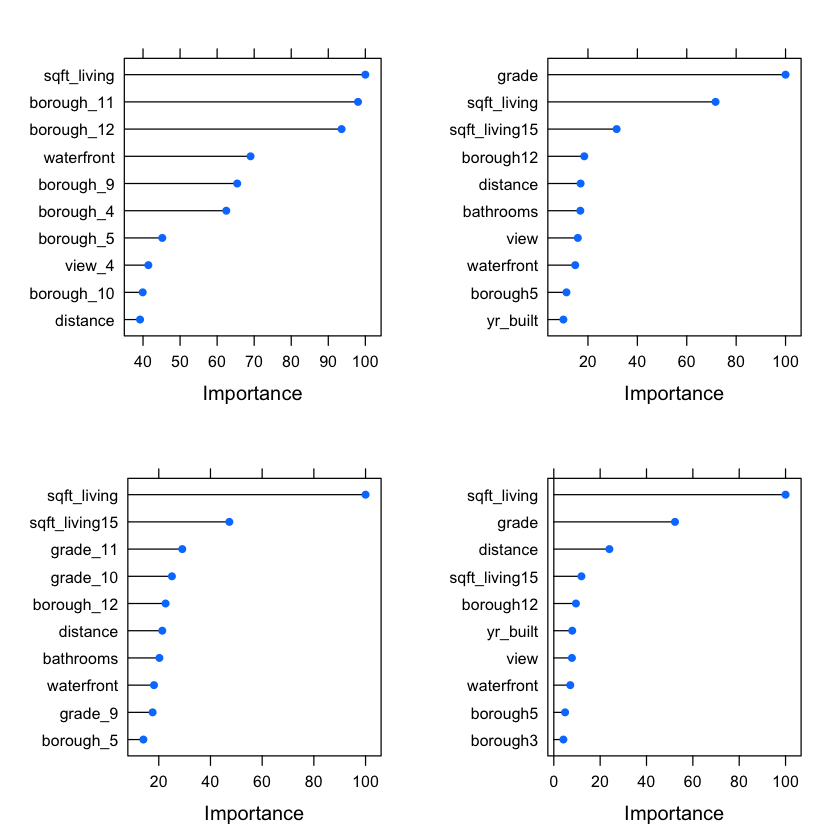

In [138]:
lmplot<-plot(varImp(lm), top = 10)
rfplot<-plot(varImp(rf), top = 10)
dummyrfplot<-plot(varImp(dummy_rf), top = 10)
xgbplot<-plot(varImp(xgb), top = 10)
grid.arrange(lmplot, rfplot, dummyrfplot, xgbplot, ncol=2)

### Metric Results

In [78]:
results <- resamples(list(LM = lm,
    RF = rf,
    DRF = dummy_rf,
    XGB = xgb)
)

summary(results)


Call:
summary.resamples(object = results)

Models: LM, RF, DRF, XGB 
Number of resamples: 5 

MAE 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LM  113931.03 114083.95 114563.13 115717.32 117794.48 118214.00    0
RF   73086.19  74106.75  74201.64  74759.31  76172.34  76229.65    0
DRF  72418.55  72435.86  75058.76  75639.42  77738.41  80545.52    0
XGB  77284.01  77530.64  78375.68  78645.98  78709.70  81329.89    0

MAPE 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LM  0.2384609 0.2421799 0.2434412 0.2425174 0.2434440 0.2450611    0
RF  0.1401916 0.1405661 0.1449939 0.1438477 0.1461413 0.1473456    0
DRF 0.1410620 0.1434224 0.1455871 0.1449015 0.1466526 0.1477836    0
XGB 0.1501358 0.1550052 0.1550852 0.1542734 0.1552191 0.1559215    0

RMSE 
        Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
LM  178437.3 179363.6 184671.0 188591.0 185216.1 215267.2    0
RF  127190.0 132077.9 134439.1 138010.1 136030.3 160313.0    0
DRF 120

### Plots of Results

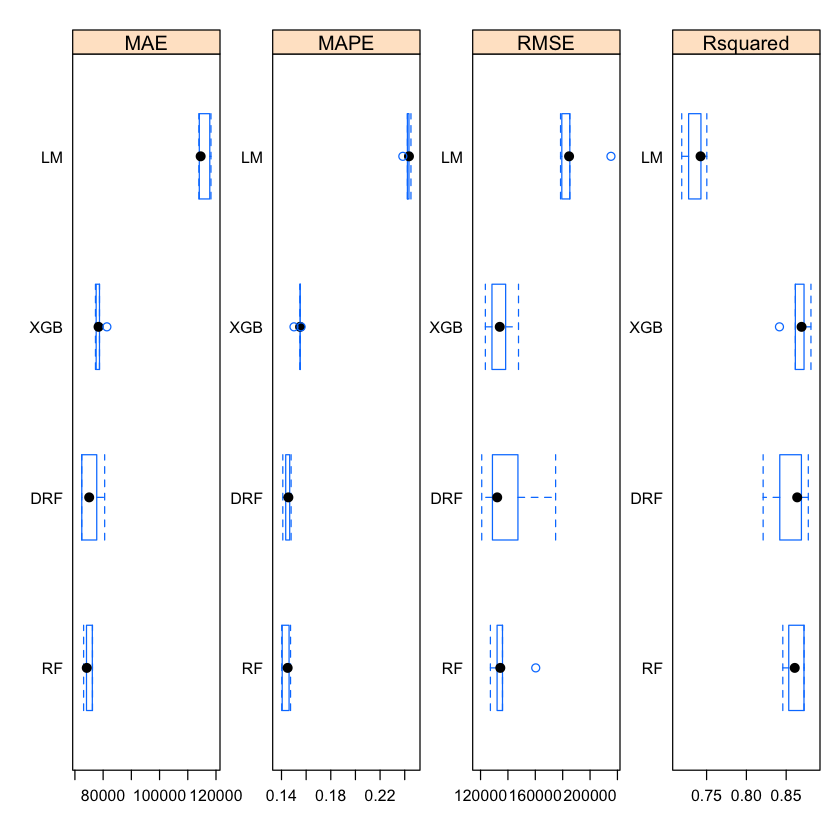

In [79]:
bwplot(results, layout = c(4, 1), scales = list(relation="free"))

Finally, we choose a normal random forest on processed data, without one hot encoding

## Hyperparameter Tuning

Finally we perform a cross validated, randomized grid search on the chosen random forest in order to define the final model.

In [ ]:
# gbmGrid <-  expand.grid(interaction.depth = c(1, 5, 9), 
#                         n.trees = (1:30)*50, 
#                         shrinkage = 0.1,
#                         n.minobsinnode = 20)
                        
# nrow(gbmGrid)

# set.seed(825)
# gbmFit2 <- train(Class ~ ., data = training, 
#                  method = "gbm", 
#                  trControl = fitControl, 
#                  verbose = FALSE, 
#                  ## Now specify the exact models 
#                  ## to evaluate:
#                  tuneGrid = gbmGrid)
# gbmFit2

In [ ]:
# 1. Define our grid of hyperparameters to tune
tuneGrid=data.table(expand.grid(mtry=c(5,15),
                                splitrule='variance',
                                min.node.size=c(2,5,10)))


dim(tuneGrid)
tuneGrid


# 2. Define the validation squema
ctrl <- trainControl(
  method = "cv",
  number = 10,
  savePredictions=TRUE
)

# 3. Train the model
ini<-now()
set.seed(123)
rangerFit <- train(
  formula,
  data = whole_data$train,
  method = "ranger", num.trees=1000,
  preProc = NULL, 
  tuneGrid = tuneGrid,
  trControl = ctrl,
  metric = "MAE"
)
print(now()-ini)


rangerFit


# inspecting the most relevant features: 
rangerFit$results
rangerFit$bestTune
rangerFit$finalModel

# we can access the K-fold validation predictions
str(rangerFit$pred)
pred_cv<-data.table(rangerFit$pred)
pred_cv[Resample=='Fold1'&mtry==5&min.node.size==5]

# and visualize a CV summary using the established metric
plot(rangerFit)

### RANDOMIZED

In [ ]:
# Again, we will use the sonar data from the previous training page to demonstrate the method with a regularized discriminant analysis by looking at a total of 30 tuning parameter combinations:

fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 10,
                           classProbs = TRUE,
                           summaryFunction = twoClassSummary,
                           # THIS MATTERS
                           search = "random")

set.seed(825)
rda_fit <- train(Class ~ ., data = training, 
                  method = "rda",
                  metric = "ROC",
                  # THIS MATTERS
                  tuneLength = 30,
                  trControl = fitControl)
rda_fit

### Fit to all train data

## Exporting Predictions
We grab the predictions on the test set and add them to it.

In [ ]:
predicted <- predict(rf, newdata = test)
df_pred<-cbind(test, predictions(predicted))
head(df_pred)

# Conclusions

In [45]:
stopCluster(cluster)